### Code for the term paper as a part of the course PHY637: Astrophysics 1

Methods as mentioned in the paper, ["Monte Carlo simulation of Lane–Emden type equations arising in
astrophysics"](https://www.sciencedirect.com/science/article/pii/S2213133722000798), El-Essawy, Nouh et al

In [1]:
#importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import math

In [11]:
# functions required for the code, p is the polytropic index "n" as used in the paper

p=0

E=math.e

C=0.5 # ranges from 0.01 to 0.8

def func_poly(y1, 
              y2, 
              e):

    return - (2*y2)/e - y1**p # + y1**p for n in (-inf, -1), - otherwise

def func_iso(y1, 
             y2, 
             e):

    return - (2*y2)/e + E**(-y1)
    # return - (2*y2)/e 

def func_wd(y1,
            y2,
            e):
    
    return - (2*y2)/e - ((y1**2)-C)**1.5

def monte_carlo(func,
                y1,
                y2,
                a,
                b,
                n=10**6):
    """
    Monte Carlo integration
    """
    
    u = np.random.uniform(size=n)

    u_func = func( y1 = y1, y2 = y2, e = a + (b-a)*u )

    s = ((b-a)/n)*u_func.sum()
    
    return s

In [12]:
# initial conditions and calculating the plotting points

e1 = e2 = 0.0

deltaE=0.001

monte_go=True

# set initial values for y1 and y2: refer to paper for defn of y1 and y2

y1=0 # =0 for the isothermal gas case, 1 for the white dwarf case and polytropic case
y2=0

list_y1 = [y1]
list_e = [e2]

while monte_go:
        
    e2 = e2 + deltaE

    y2 = y2 + monte_carlo(func_poly,
                          y1,
                          y2,
                          a=e1,
                          b=e2)

    y1 = y1 + deltaE*y2

    e1 = e2

    list_y1.append(y1)
    
    list_e.append(e2)

    print(y1, e2)


    if y1 < 0 or e2 > 35 or y1==np.nan:

        monte_go=False

-1e-06 0.001


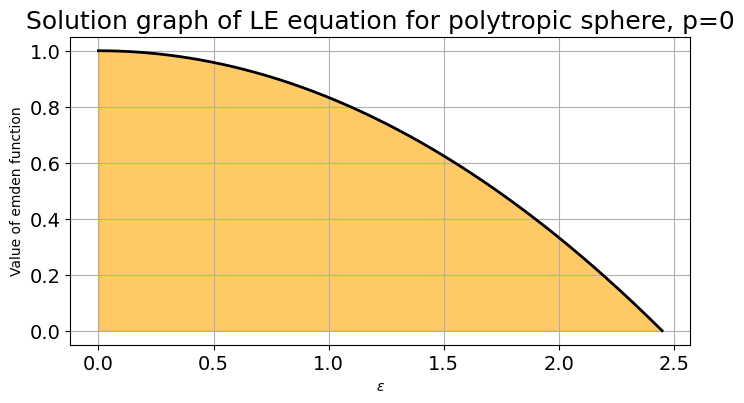

In [4]:
# plotting the solutions

plt.figure(figsize=(8,4))

plt.title("Solution graph of LE equation for polytropic sphere, p=0",
         fontsize=18)

plt.plot(list_e,
         list_y1,
         '-',
         c = 'k',
         lw = 2)

plt.fill_between(list_e,
                 y1 = list_y1,
                 y2 = 0,
                 color = 'orange',
                 alpha = 0.6)

plt.grid(True)

plt.xticks(fontsize = 14)

plt.yticks(fontsize = 14)

plt.xlabel('$\epsilon$')

plt.ylabel("Value of emden function")

plt.show()

[ 1.00000000e+00  9.99999000e-01  9.99998386e-01 ...  1.21632821e-03
  4.00161568e-04 -4.16338408e-04]
[1.00000000e+00 9.99999833e-01 9.99999333e-01 ... 2.03183333e-03
 1.21600000e-03 3.99833333e-04]


Text(0, 0.5, 'Absolute error, p=0')

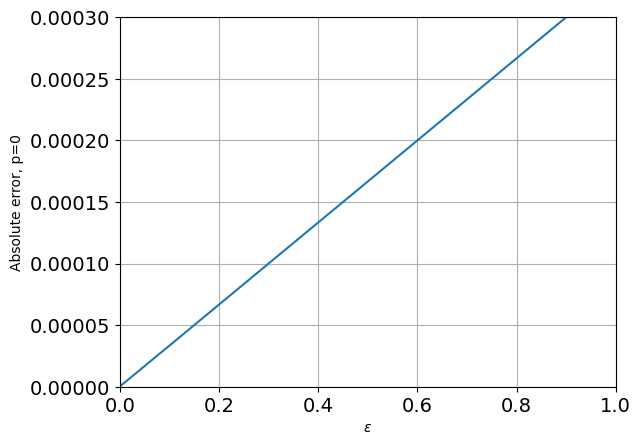

In [10]:
y1_array = np.array(list_y1)

print(y1_array)

e2_array = np.array(list_e)

def poly_0(xi):
    return 1 - (xi**2)/6

def poly_1(xi):
    return np.sinc(xi)

def poly_5(xi):
    return 1/((1 + (xi**2)/3)**0.5)

result = poly_0(e2_array)

print(result)

absolute_err=abs(y1_array - result)

plt.plot(e2_array, 
            absolute_err)

plt.xlim(0,1)

plt.ylim(0,0.0003)

plt.grid(True)

plt.xticks(fontsize = 14)

plt.yticks(fontsize = 14)

plt.xlabel('$\epsilon$')

plt.ylabel("Absolute error, p=0")